# Loading dataset


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\tiwar\Documents\advanced python\cleaned_data_age_int.csv")
df

,Name,Age,Gender,Location,Category,Faced Discrimination,Reservation,Position,Selection,promotion
0,Pranjal Tiwari,17,Female,West Delhi,General,Yes,0.0,Undergraduate,Merit-based,Not sure
1,Vansh,17,Male,My house,Prefer not to say,Not Sure,0.0,Other,Mixed,Not Sure
2,Vansh,55,Male,Delhi,General,Yes,0.0,Undergraduate,Merit-based,Yes
3,Harpreet Singh,43,Male,Delhi,General,No,0.0,Employee,Mixed,Yes
4,Aditi Das,21,Female,New Delhi,SC,No,15.0,Undergraduate,Merit-based,Yes
...,...,...,...,...,...,...,...,...,...,...
678,Suresh Verma,21,Male,Chennai,OBC,No,27.0,Undergraduate,Reservation,No
679,Priyanka Tiwari,17,Male,Kolkata,OBC,No,27.0,Employee,Merit-based,Not Sure
680,Vikram Kapoor,43,Male,Chennai,EWS,No,10.0,Employee,Mixed,Yes
681,Priya Sharma,55,Other,Lucknow,OBC,Not Sure,27.0,Employee,Mixed,Not Sure


# Info Gathering

In [3]:
df.shape


(683, 10)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  683 non-null    object 
 1   Age                   683 non-null    int64  
 2   Gender                683 non-null    object 
 3   Location              683 non-null    object 
 4   Category              683 non-null    object 
 5   Faced Discrimination  683 non-null    object 
 6   Reservation           683 non-null    float64
 7   Position              683 non-null    object 
 8   Selection             683 non-null    object 
 9   promotion             683 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 53.5+ KB


In [5]:
df['Reservation'].mean()


np.float64(8.854319180087847)

In [ ]:
df['Reservation'].median()


In [ ]:
df['Reservation'].std()


In [ ]:
df.min()


In [ ]:
df.max


In [ ]:
df.head(2)



In [ ]:
df.tail(2)


In [ ]:
df.count()


In [ ]:
df.describe()

# Data Cleaning/Manipulation

In [ ]:
df.rename(columns={'Selection_Process' : 'Selection'},inplace=True)
df.head(2)

In [ ]:
df.duplicated().sum()

In [ ]:
df.isnull().sum()

In [ ]:
x = df['promotion'].mode().iloc[0]
df.fillna({'promotion': x}, inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
x = df['Faced Discrimination'].mode().iloc[0]
df['Faced Discrimination'] = df['Faced Discrimination'].fillna(x)

In [ ]:
df.isnull().sum()

In [ ]:
x = df['Position'].mode().iloc[0]
df['Position'] = df['Position'].fillna(x)


In [ ]:
df.isnull().sum()

In [ ]:
df.to_csv('cleaned_data.csv', index=False)


# Sorting

In [ ]:
df.sort_values(by='Reservation',ascending=False)

# Filtering

In [ ]:
df[df['Category'] == 'OBC']


In [ ]:
df[df['Category'] == 'General']


In [ ]:
df[df['Category'] == 'SC']


In [ ]:
df[df['Category'] == 'ST']


In [ ]:
import requests

def convert_currency(amount, from_currency, to_currency):
    url = f"https://api.frankfurter.app/latest?amount={amount}&from={from_currency}&to={to_currency}"
    print(" API URL:", url)

    try:
        response = requests.get(url)
        data = response.json()

        if to_currency not in data["rates"]:
            return "Failed to convert. Try different currency codes."

        result = data["rates"][to_currency]
        return f" {amount} {from_currency} = {result:.2f} {to_currency}"

    except Exception as e:
        return f" Error: {e}"


amount = float(input("Enter amount: "))
from_currency = input("From currency (e.g. INR): ").upper()
to_currency = input("To currency (e.g. USD): ").upper()

output = convert_currency(amount, from_currency, to_currency)
print(output)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\tiwar\Documents\advanced python\cleaned_data.csv")

# Clean & preprocess
df_clean = df[df['Reservation'].notnull()].copy()
df_clean['Category_num'] = df_clean['Category'].astype('category').cat.codes

plt.style.use('seaborn-v0_8')
figsize = (8, 5)

# 1. Line Plot: Average Reservation by Category
line_data = df_clean.groupby('Category')['Reservation'].mean()
plt.figure(figsize=figsize)
ax1 = plt.subplot(3, 4, 4)
plt.plot(line_data.index, line_data.values, marker='o')
plt.title("Average Reservation by Category")
plt.xlabel("Category")
plt.ylabel("Average Reservation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Stack Plot: Gender counts by Category
gender_counts = df_clean.groupby(['Category', 'Gender']).size().unstack().fillna(0)
plt.figure(figsize=figsize)
ax2 = plt.subplot(3, 4, 8)
plt.stackplot(gender_counts.index, gender_counts.T, labels=gender_counts.columns)
plt.title("Stacked Gender Counts by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Bar Chart: Category Count
plt.figure(figsize=(10, 6))
ax3 = plt.subplot(3, 4, 10)
df_clean['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Category Count")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Violin Plot: Reservation by Gender
plt.figure(figsize=(10, 6))
ax4 = plt.subplot(3, 4, 6)
import seaborn as sns
sns.violinplot(x='Gender', y='Reservation', data=df_clean, ax=ax4)
plt.title("Reservation by Gender")
plt.tight_layout()
plt.show()

# 5. Box Plot: Reservation by Category
plt.figure(figsize=(10, 6))
ax5 = plt.subplot(3, 4, 5)
sns.boxplot(x='Category', y='Reservation', data=df_clean, ax=ax5)
plt.title("Reservation by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Histogram: Reservation Distribution
plt.figure(figsize=(10, 6))
ax6 = plt.subplot(3, 4, 7)
ax6.hist(df_clean['Reservation'], bins=10, color='teal', edgecolor='black')
plt.title("Histogram of Reservation")
plt.xlabel("Reservation")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 7. Pie Chart: Gender Distribution
plt.figure(figsize=(10, 6))
ax7 = plt.subplot(3, 4, 1)
gender_counts = df_clean['Gender'].value_counts()
ax7.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender Distribution")
plt.ylabel("")  # Remove y-label
plt.tight_layout()
plt.show()

# 8. Scatter Plot: Reservation vs. Encoded Category
plt.figure(figsize=(10, 6))
ax8 = plt.subplot(3, 4, 9)
ax8.scatter(df_clean['Category_num'], df_clean['Reservation'], alpha=0.6)
plt.title("Reservation vs. Category (Encoded)")
plt.xlabel("Category (Encoded)")
plt.ylabel("Reservation")
plt.tight_layout()
plt.show()

# 9. Horizontal Bar Chart: Selection Type Count
plt.figure(figsize=(10, 6))
ax9 = plt.subplot(3, 4, 2)
selection_counts = df_clean['Selection'].value_counts()
ax9.barh(selection_counts.index, selection_counts.values, color='coral')
plt.title("Selection Type Counts")
plt.xlabel("Count")
plt.ylabel("Selection")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv(r"C:\Users\tiwar\Documents\advanced python\cleaned_data.csv")

# Encode categorical columns
df['Category_code'] = pd.factorize(df['Category'])[0]
df['Gender_code'] = pd.factorize(df['Gender'])[0]

# Create subplots
fig = plt.figure(figsize=(25, 15))

# 1. Stackplot: Gender Distribution by Category
ax1 = plt.subplot(3, 3, 1)
categories = df['Category'].unique()
x = np.arange(len(categories))
male = [len(df[(df['Category'] == c) & (df['Gender'] == 'M')]) for c in categories]
female = [len(df[(df['Category'] == c) & (df['Gender'] == 'F')]) for c in categories]
other = [len(df[(df['Category'] == c) & (~df['Gender'].isin(['M', 'F']))]) for c in categories]
ax1.stackplot(x, female, male, other)
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.set_title("Stackplot: Gender Distribution by Category")
ax1.set_xlabel("Category")
ax1.set_ylabel("Count")

# 2. Bar chart: Category Frequency
ax2 = plt.subplot(3, 3, 2)
df['Category'].value_counts().plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title("Barchart: Category Frequency")
ax2.set_xlabel("Category")
ax2.set_ylabel("Count")

# 3. Scatterplot: Reservation by Category
ax3 = plt.subplot(3, 3, 3)
ax3.scatter(df['Category_code'], df['Reservation'], color='green', edgecolor='black')
ax3.set_title("Scatterplot: Reservation by Category")
ax3.set_xlabel("Category (encoded)")
ax3.set_ylabel("Reservation")

# 4. Lineplot: Avg Reservation per Category
ax4 = plt.subplot(3, 3, 4)
avg_res = df.groupby('Category')['Reservation'].mean()
ax4.plot(avg_res.index, avg_res.values, marker='o', color='red')
ax4.set_title("Lineplot: Avg Reservation per Category")
ax4.set_xlabel("Category")
ax4.set_ylabel("Average Reservation")

# 5. Horizontal bar chart: Selection counts
ax5 = plt.subplot(3, 3, 5)
df['Selection'].value_counts().plot(kind='barh', ax=ax5, color='orchid')
ax5.set_title("H-bar Chart: Selection Types")
ax5.set_xlabel("Count")
ax5.set_ylabel("Selection")

# 6. Pie chart: Gender distribution
ax6 = plt.subplot(3, 3, 6)
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax6)
ax6.set_ylabel('')
ax6.set_title("Piechart: Gender Breakdown")

# 7. Histogram: Reservation distribution
ax7 = plt.subplot(3, 3, 7)
ax7.hist(df['Reservation'], bins=10, color='black')
ax7.set_title("Histogram: Reservation Values")
ax7.set_xlabel("Reservation")
ax7.set_ylabel("Frequency")

# 8. Boxplot: Reservation by Category
ax8 = plt.subplot(3, 3, 8)
df.boxplot(column='Reservation', by='Category', ax=ax8)
ax8.set_title("Boxplot: Reservation by Category")
ax8.set_xlabel("Category")
ax8.set_ylabel("Reservation")
plt.suptitle("")

# 9. Violinplot: Reservation by Gender
ax9 = plt.subplot(3, 3, 9)
genders = df['Gender'].unique()
data_violin = [df[df['Gender'] == g]['Reservation'] for g in genders]
ax9.violinplot(data_violin, showmeans=True)
ax9.set_xticks(np.arange(1, len(genders)+1))
ax9.set_xticklabels(genders)
ax9.set_title("Violinplot: Reservation by Gender")
ax9.set_xlabel("Gender")
ax9.set_ylabel("Reservation")

# Final layout adjustments
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Load cleaned data
df = pd.read_csv(r"C:\Users\tiwar\Documents\advanced python\cleaned_data.csv")

# Encode categorical columns
df['Category_code'] = pd.factorize(df['Category'])[0]
df['Gender_code'] = pd.factorize(df['Gender'])[0]

# Create figure with GridSpec layout
fig = plt.figure(figsize=(22, 15))
gs = gridspec.GridSpec(4, 4, figure=fig)  # 4x4 grid layout

# Helper function to add border
def add_border(ax):
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

# 1. Stackplot
ax1 = fig.add_subplot(gs[0, 0:2])
categories = df['Category'].unique()
x = np.arange(len(categories))
male = [len(df[(df['Category'] == c) & (df['Gender'] == 'M')]) for c in categories]
female = [len(df[(df['Category'] == c) & (df['Gender'] == 'F')]) for c in categories]
other = [len(df[(df['Category'] == c) & (~df['Gender'].isin(['M', 'F']))]) for c in categories]
ax1.stackplot(x, female, male, other)
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.set_title("Stackplot: Gender Distribution by Category")
add_border(ax1)

# 2. Bar chart
ax2 = fig.add_subplot(gs[0, 2:])
df['Category'].value_counts().plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title("Bar Chart: Category Frequency")
add_border(ax2)

# 3. Scatterplot
ax3 = fig.add_subplot(gs[1, 0])
ax3.scatter(df['Category_code'], df['Reservation'], color='green', edgecolor='black')
ax3.set_title("Scatter: Reservation vs Category")
add_border(ax3)

# 4. Lineplot
ax4 = fig.add_subplot(gs[1, 1])
avg_res = df.groupby('Category')['Reservation'].mean()
ax4.plot(avg_res.index, avg_res.values, marker='o', color='red')
ax4.set_title("Lineplot: Avg Reservation")
add_border(ax4)

# 5. Horizontal bar chart
ax5 = fig.add_subplot(gs[1, 2:])
df['Selection'].value_counts().plot(kind='barh', ax=ax5, color='orchid')
ax5.set_title("H-Bar: Selection Types")
add_border(ax5)

# 6. Pie chart
ax6 = fig.add_subplot(gs[2, 0])
df['Gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    ax=ax6,
    wedgeprops={'edgecolor': 'black', 'linewidth': 2}
)
ax6.add_patch(plt.Rectangle(
    (-1.15, -1.15), 2.3, 2.3, fill=False, color='black', linewidth=3, zorder=50
))
ax6.set_ylabel('')
ax6.set_title("Pie: Gender")

# 7. Histogram
ax7 = fig.add_subplot(gs[2, 1])
ax7.hist(df['Reservation'], bins=10, color='black')
ax7.set_title("Histogram: Reservation")
add_border(ax7)

# 8. Boxplot
ax8 = fig.add_subplot(gs[2, 2])
df.boxplot(column='Reservation', by='Category', ax=ax8)
ax8.set_title("Boxplot: Reservation by Category")
ax8.figure.suptitle("")
add_border(ax8)

# 9. Violin-style (scatter)
ax9 = fig.add_subplot(gs[2, 3])
genders = df['Gender'].unique()
data = [df[df['Gender'] == g]['Reservation'] for g in genders]
ax9.violinplot(data, showmeans=True)
ax9.set_xticks(np.arange(1, len(genders)+1))
ax9.set_xticklabels(genders)
ax9.set_title("Violin (Style): Reservation by Gender")
add_border(ax9)

plt.subplots_adjust(
    hspace=0.5, 
    wspace=0.3)

plt.show()


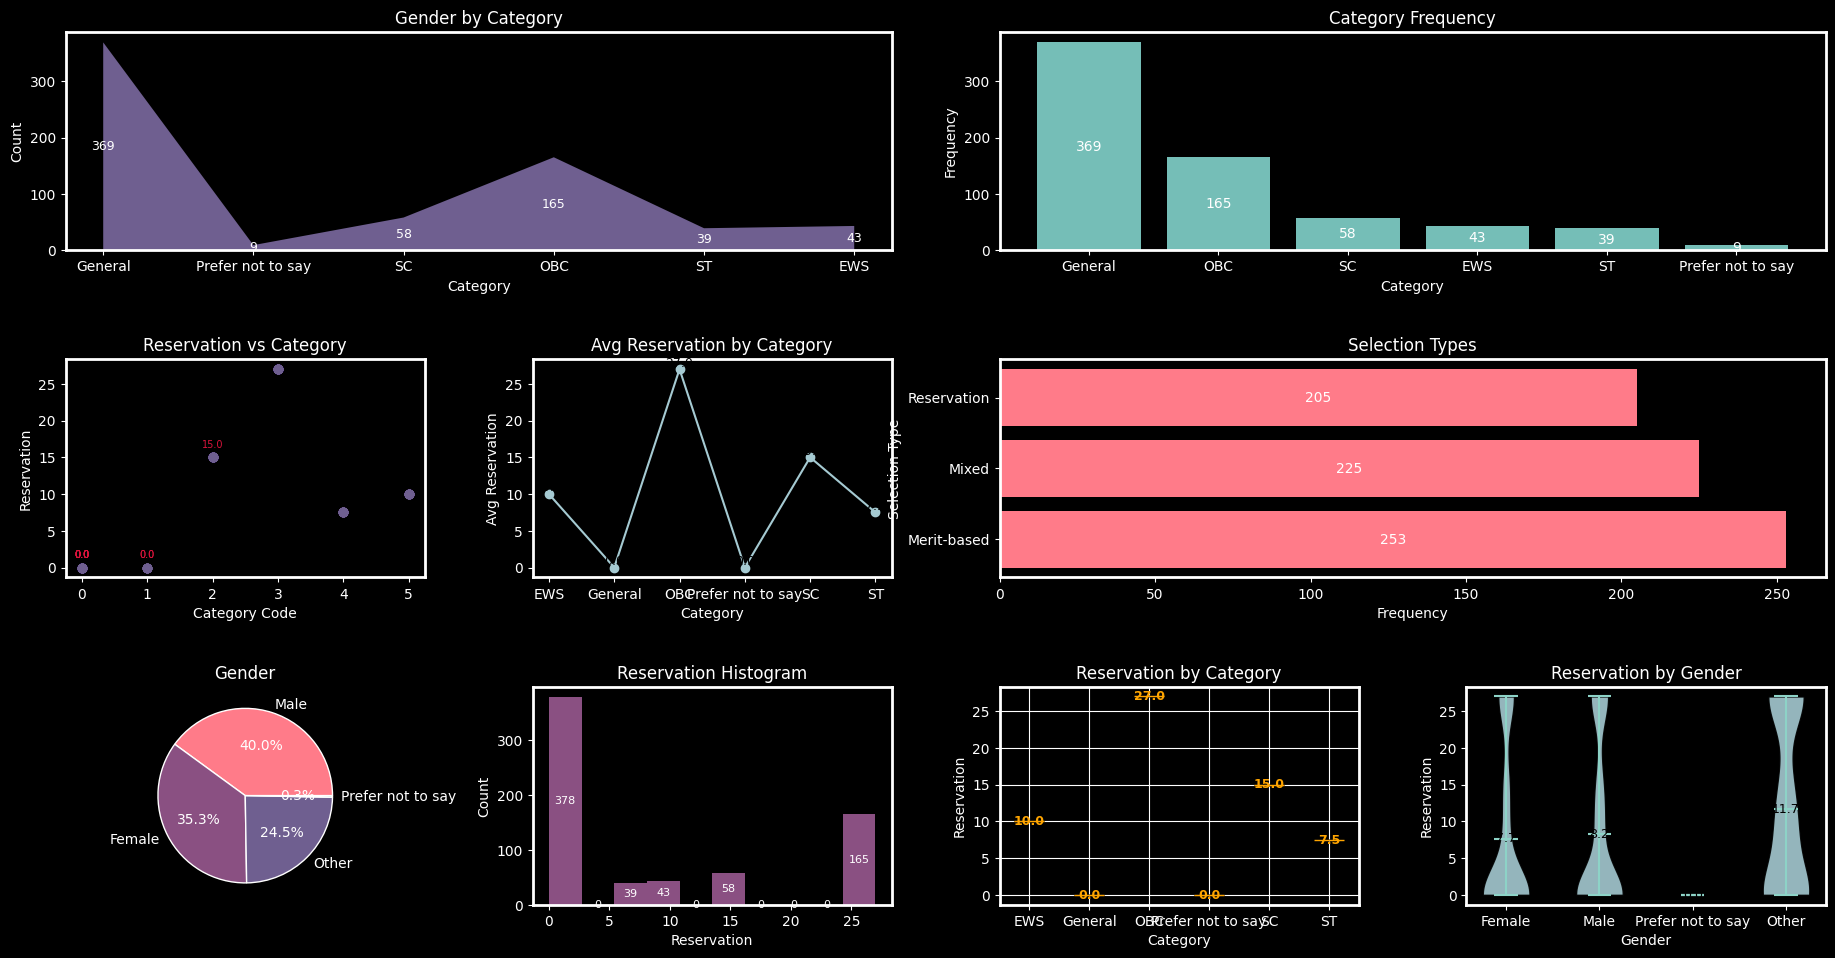

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

df = pd.read_csv(r"C:\Users\tiwar\Documents\advanced python\cleaned_data.csv")
df['Category_code'] = pd.factorize(df['Category'])[0]
df['Gender_code'] = pd.factorize(df['Gender'])[0]

colors = {
    'female':   '#FF7B89',  # pastel coral-pink
    'male':     '#8A5082',  # pastel purple
    'other':    '#6F5F90',  # muted blue-purple
    'bar':      '#75BEB7',  # minty blue
    'scatter':  '#6F5F90',  # muted blue-purple
    'line':     '#A5CAD2',  # powder blue
    'hbar':     '#FF7B89',  # pastel coral-pink
    'hist':     '#8A5082',  # pastel purple
    'box':      '#75BEB7',  # minty blue
    'violin':   '#A5CAD2',  # powder blue
}
plt.style.use('dark_background')


fig = plt.figure(figsize=(22, 16))
gs = gridspec.GridSpec(4, 4, figure=fig)

def add_border(ax):
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
        spine.set_linewidth(2)

# Stackplot with annotation
ax1 = fig.add_subplot(gs[0, 0:2])
categories = df['Category'].unique()
x = np.arange(len(categories))
male = [len(df[(df['Category'] == c) & (df['Gender'] == 'M')]) for c in categories]
female = [len(df[(df['Category'] == c) & (df['Gender'] == 'F')]) for c in categories]
other = [len(df[(df['Category'] == c) & (~df['Gender'].isin(['M', 'F']))]) for c in categories]
layers = np.array([female, male, other])
cumsum = np.cumsum(layers, axis=0)
ax1.stackplot(x, female, male, other, colors=[colors['female'], colors['male'], colors['other']])
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.set_xlabel("Category", color='white')
ax1.set_ylabel("Count", color='white')
ax1.set_title("Gender by Category", color='white')
for i, cat in enumerate(categories):
    ypos = 0
    for idx, grp in enumerate(['female', 'male', 'other']):
        val = layers[idx, i]
        if val > 0:
            ax1.text(i, ypos + val/2, str(val), ha='center', va='center', fontsize=9, color='white')
        ypos += val
add_border(ax1)

# Bar chart with labels inside bars
ax2 = fig.add_subplot(gs[0, 2:])
category_counts = df['Category'].value_counts()
bars = ax2.bar(category_counts.index, category_counts.values, color=colors['bar'])
for bar in bars:
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, '%d' % bar.get_height(),
             ha='center', va='center', color='white', fontsize=10)
ax2.set_xlabel("Category", color='white')
ax2.set_ylabel("Frequency", color='white')
ax2.set_title("Category Frequency", color='white')
add_border(ax2)

# Scatterplot – label first 10 points as an example
ax3 = fig.add_subplot(gs[1, 0])
ax3.scatter(df['Category_code'], df['Reservation'], color=colors['scatter'])
for i in range(min(10, len(df))):
    ax3.annotate(f"{df['Reservation'].iloc[i]}", 
                 (df['Category_code'].iloc[i], df['Reservation'].iloc[i]), 
                 textcoords="offset points", xytext=(0,7), ha='center', fontsize=7, color='crimson')
ax3.set_xlabel('Category Code', color='white')
ax3.set_ylabel('Reservation', color='white')
ax3.set_title("Reservation vs Category", color='white')
add_border(ax3)

# Lineplot with point labels
ax4 = fig.add_subplot(gs[1, 1])
avg_res = df.groupby('Category')['Reservation'].mean()
ax4.plot(avg_res.index, avg_res.values, marker='o', color=colors['line'])
for i, (cat, val) in enumerate(zip(avg_res.index, avg_res.values)):
    ax4.text(cat, val, f"{val:.1f}", fontsize=9, ha='center', va='bottom', color='black')
ax4.set_xlabel("Category", color='white')
ax4.set_ylabel("Avg Reservation", color='white')
ax4.set_title("Avg Reservation by Category", color='white')
add_border(ax4)

# Horizontal bar chart with inside labels
ax5 = fig.add_subplot(gs[1, 2:])
selection_counts = df['Selection'].value_counts()
bars_h = ax5.barh(selection_counts.index, selection_counts.values, color=colors['hbar'])
for bar in bars_h:
    ax5.text(bar.get_width()/2, bar.get_y() + bar.get_height()/2, '%d' % bar.get_width(),
             ha='center', va='center', color='white', fontsize=10)
ax5.set_xlabel("Frequency", color='white')
ax5.set_ylabel("Selection Type", color='white')
ax5.set_title("Selection Types", color='white')
add_border(ax5)

# Pie chart – labels are inside by default
ax6 = fig.add_subplot(gs[2, 0])
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
pie_colors = ['#FF7B89', '#8A5082', '#6F5F90', '#75BEB7', '#A5CAD2']

ax6.pie(
    gender_counts,
    labels=labels,
    colors=pie_colors[:len(labels)],   # Use only as many colors as categories
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'white'}  # White edge for strong contrast on dark colors
)
ax6.set_title("Gender", color='white')


# Histogram with bin labels
ax7 = fig.add_subplot(gs[2, 1])
n, bins, patches = ax7.hist(df['Reservation'], bins=10, color=colors['hist'])
for i in range(len(patches)):
    ax7.text((bins[i]+bins[i+1])/2, n[i]/2, '%d' % n[i], ha='center', va='center', color='white', fontsize=8)
ax7.set_xlabel("Reservation", color='white')
ax7.set_ylabel("Count", color='white')
ax7.set_title("Reservation Histogram", color='white')
add_border(ax7)

# Boxplot – annotate median for each box (minimal for clarity)
ax8 = fig.add_subplot(gs[2, 2])
bp = df.boxplot(column='Reservation', by='Category', ax=ax8, 
                patch_artist=True, boxprops=dict(facecolor=colors['box'], color='black'),
                medianprops=dict(color='#FFA500'))
medians = df.groupby('Category')['Reservation'].median()
for tick, median in zip(range(1, len(medians)+1), medians):
    ax8.text(tick, median, f"{median:.1f}", ha='center', va='center', color='orange', fontsize=9, weight='bold')
ax8.set_xlabel("Category", color='white')
ax8.set_ylabel("Reservation", color='white')
ax8.set_title("Reservation by Category", color='white')
ax8.figure.suptitle("")
add_border(ax8)

# Violin plot – annotate mean values
ax9 = fig.add_subplot(gs[2, 3])
genders = df['Gender'].unique()
data = [df[df['Gender'] == g]['Reservation'] for g in genders]
means = [d.mean() for d in data]
parts = ax9.violinplot(data, showmeans=True)
for body in parts['bodies']:
    body.set_facecolor(colors['violin'])
    body.set_edgecolor('black')
    body.set_alpha(0.9)
ax9.set_xticks(np.arange(1, len(genders) + 1))
ax9.set_xticklabels(genders)
for i, m in enumerate(means):
    ax9.text(i+1, m, f"{m:.1f}", color='black', va='center', ha='center', fontsize=9)
ax9.set_xlabel("Gender", color='white')
ax9.set_ylabel("Reservation", color='white')
ax9.set_title("Reservation by Gender", color='white')
add_border(ax9)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


# SEABORN

C:\Users\tiwar\AppData\Local\Temp\ipykernel_1068\3159292863.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette=palette_sequence)
C:\Users\tiwar\AppData\Local\Temp\ipykernel_1068\3159292863.py:18: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Category', data=df, palette=palette_sequence)


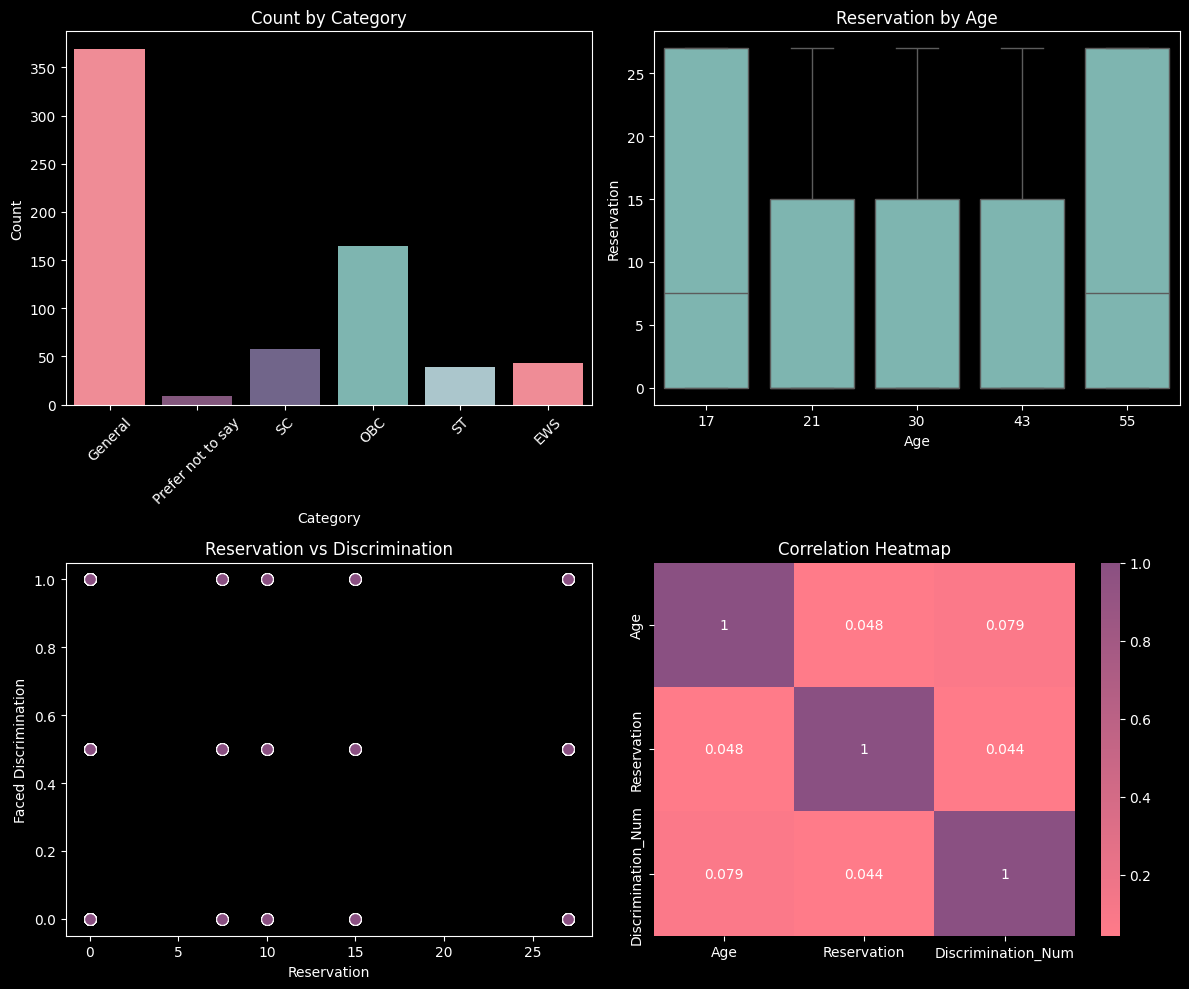

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\tiwar\Documents\advanced python\cleaned_data.csv")
df['Discrimination_Num'] = df['Faced Discrimination'].map({'Yes': 1, 'No': 0, 'Not Sure': 0.5})

# Use a dark theme for the figure background and axes
plt.style.use('dark_background')
plt.figure(figsize=(12, 10))

# Define the pastel palette from your image
palette_sequence = ['#FF7B89', '#8A5082', '#6F5F90', '#75BEB7', '#A5CAD2']

# 1. Count Plot for 'Category'
plt.subplot(2, 2, 1)
sns.countplot(x='Category', data=df, palette=palette_sequence)
plt.title("Count by Category", color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.xlabel('Category', color='white')
plt.ylabel('Count', color='white')

# 2. Box Plot
plt.subplot(2, 2, 2)
sns.boxplot(x='Age', y='Reservation', data=df, color= '#75BEB7')  # Pick a palette color
plt.title("Reservation by Age", color='white')
plt.xlabel('Age', color='white')
plt.ylabel('Reservation', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

# 3. Scatter Plot: Reservation vs Discrimination
plt.subplot(2, 2, 3)
sns.scatterplot(
    x='Reservation',
    y='Discrimination_Num',
    data=df,
    color=palette_sequence[1],  # Use a palette color
    s=70
)
plt.title("Reservation vs Discrimination", color='white')
plt.xlabel('Reservation', color='white')
plt.ylabel('Faced Discrimination', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

# 4. Correlation Heatmap (keep the heatmap style, but pastelize the annotation)
from matplotlib.colors import LinearSegmentedColormap

# Define your custom palette using the attachment’s hex codes
pastel_palette = ['#FF7B89', '#8A5082']
custom_cmap = LinearSegmentedColormap.from_list('custom_pastel', pastel_palette, N=256)

plt.subplot(2, 2, 4)
corr = df.select_dtypes('number').corr()
sns.heatmap(
    corr,
    annot=True,
    cmap=custom_cmap,                        # Use your custom palette here!
    annot_kws={"color": "white"}
)
plt.title("Correlation Heatmap", color='white')
plt.xticks(color='white')
plt.yticks(color='white')


plt.tight_layout()
plt.show()
